#Final Project Code

In [ ]:
!pip install scikit-learn --upgrade

import tensorflow as tf
from sklearn.model_selection import train_test_split, KFold
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from sklearn.ensemble import BaggingClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

In [ ]:
!pip freeze > requirements.txt

##Data Processing

[Data link](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

In [ ]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.Class.value_counts()

,count
Class,
0,284315
1,492


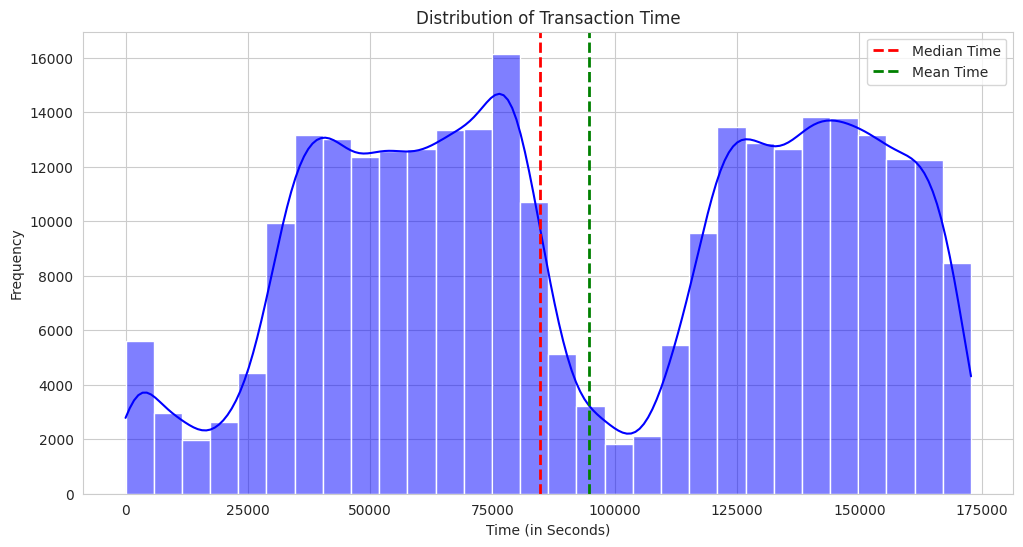

In [ ]:
sns.set_style('whitegrid')

# create a histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['Time'], bins=30, kde=True, color='blue')
plt.title('Distribution of Transaction Time')
plt.xlabel("Time (in Seconds)")
plt.ylabel("Frequency")
plt.axvline(x = df['Time'].median(), color='red', linestyle='dashed', linewidth=2, label='Median Time')
plt.axvline(x = df['Time'].mean(), color='green', linestyle='dashed', linewidth=2, label='Mean Time')
plt.legend()
plt.show()

In [ ]:
X = df.drop('Class', axis=1).to_numpy()
y = df['Class'].to_numpy()

###Data Undersampling and Splitting

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.under_sampling import RandomUnderSampler
import numpy as np

# Suppose X, y are your original features and labels
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

# Now apply undersampling to the training data
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

class FraudDataset(Dataset):
    def __init__(self, X, y):
        # X: torch.Tensor of shape (num_samples, seq_length, n_features)
        # y: torch.Tensor of shape (num_samples,)
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

RNN Model archetcture



In [ ]:
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=1, rnn_type='LSTM', dropout=0.0, bidirectional=False):
        super(RNNModel, self).__init__()

        if rnn_type == 'LSTM':
            self.rnn = nn.LSTM(input_size,
                                hidden_size,
                                num_layers=num_layers,
                                batch_first=True,
                                dropout=dropout,
                                bidirectional=bidirectional)
        else:
            self.rnn = nn.GRU(input_size,
                               hidden_size,
                               num_layers=num_layers,
                               batch_first=True,
                               dropout=dropout,
                               bidirectional=bidirectional)

        # If bidirectional, hidden state size is doubled
        self.bidirectional = bidirectional
        factor = 2 if bidirectional else 1

        self.fc = nn.Linear(hidden_size * factor, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # x: (batch, seq_length, input_size)
        out, _ = self.rnn(x)  # out shape: (batch, seq_length, hidden_size * factor)
        # Take the last time-step output
        out = out[:, -1, :]  # shape: (batch, hidden_size * factor)
        out = self.fc(out)   # shape: (batch, 1)
        out = self.sigmoid(out)
        return out

##Training Function

In [ ]:
def train_model(model, train_loader, num_epochs=10, lr=1e-3, class_weight=None,):
    criterion = nn.BCELoss(weight=class_weight) if class_weight is not None else nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.device = device

    model.train()
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        correct = 0
        total = 0

        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(model.device), y_batch.to(model.device)
            optimizer.zero_grad()

            outputs = model(X_batch)
            loss = criterion(outputs, y_batch.unsqueeze(1).float())

            loss.backward()
            optimizer.step()

            epoch_loss += loss.item() * X_batch.size(0)

            # Compute accuracy: threshold at 0.5
            preds = (outputs >= 0.5).int()
            correct += (preds.squeeze() == y_batch).sum().item()
            total += y_batch.size(0)

        # Compute average training loss and accuracy for the epoch
        avg_loss = epoch_loss / total
        accuracy = correct / total

        print(f"Epoch: {epoch+1}, Training Loss: {avg_loss:.4f}, Training Accuracy: {accuracy:.4f}")

    return model

#Training Clean Data

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Convert and reshape the data
X_train_tensor = torch.from_numpy(X_train_resampled).float().unsqueeze(1) # (num_samples, 1, num_features)
y_train_tensor = torch.from_numpy(y_train_resampled).float()

# Use the reshaped tensors in the dataset
train_dataset = FraudDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Now X_train_tensor has shape (num_samples, 1, num_features)
input_size = X_train_tensor.shape[2]

# Model A: LSTM based
model_a = RNNModel(input_size=input_size, hidden_size=64, rnn_type='LSTM').to(device)
model_a = train_model(model_a, train_loader, num_epochs=10, lr=1e-3)

# Model B: GRU based
model_b = RNNModel(input_size=input_size, hidden_size=64, rnn_type='GRU').to(device)
model_b = train_model(model_b, train_loader, num_epochs=10, lr=1e-3)

# Model C: biLSTM model
model_c = RNNModel(input_size=input_size, hidden_size=64, rnn_type='LSTM', dropout=0.2, bidirectional=True).to(device)
model_c = train_model(model_c, train_loader, num_epochs=10, lr=1e-3)

# Model D: biGRU model
model_d = RNNModel(input_size=input_size, hidden_size=64, rnn_type='GRU', dropout=0.2, bidirectional=True).to(device)
model_d = train_model(model_d, train_loader, num_epochs=10, lr=1e-3)

torch.save(model_a.state_dict(), "model_a.pth")
torch.save(model_b.state_dict(), "model_b.pth")
torch.save(model_c.state_dict(), "model_c.pth")
torch.save(model_d.state_dict(), "model_d.pth")

Epoch: 1, Training Loss: 0.6934, Training Accuracy: 0.5178
Epoch: 2, Training Loss: 0.6936, Training Accuracy: 0.5000
Epoch: 3, Training Loss: 0.6934, Training Accuracy: 0.5000
Epoch: 4, Training Loss: 0.6933, Training Accuracy: 0.5000
Epoch: 5, Training Loss: 0.6933, Training Accuracy: 0.4975
Epoch: 6, Training Loss: 0.6931, Training Accuracy: 0.4810
Epoch: 7, Training Loss: 0.6931, Training Accuracy: 0.5089
Epoch: 8, Training Loss: 0.6931, Training Accuracy: 0.5038
Epoch: 9, Training Loss: 0.6932, Training Accuracy: 0.5000
Epoch: 10, Training Loss: 0.6932, Training Accuracy: 0.5000
Epoch: 1, Training Loss: 0.7254, Training Accuracy: 0.5000
Epoch: 2, Training Loss: 0.6942, Training Accuracy: 0.5051
Epoch: 3, Training Loss: 0.6950, Training Accuracy: 0.5000
Epoch: 4, Training Loss: 0.6935, Training Accuracy: 0.4949
Epoch: 5, Training Loss: 0.6936, Training Accuracy: 0.5000
Epoch: 6, Training Loss: 0.6937, Training Accuracy: 0.4822
Epoch: 7, Training Loss: 0.6935, Training Accuracy: 0.4

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


Epoch: 4, Training Loss: 0.6932, Training Accuracy: 0.4822
Epoch: 5, Training Loss: 0.6928, Training Accuracy: 0.4987
Epoch: 6, Training Loss: 0.6943, Training Accuracy: 0.4594
Epoch: 7, Training Loss: 0.6936, Training Accuracy: 0.5000
Epoch: 8, Training Loss: 0.6933, Training Accuracy: 0.4721
Epoch: 9, Training Loss: 0.6933, Training Accuracy: 0.4962
Epoch: 10, Training Loss: 0.6936, Training Accuracy: 0.4873
Epoch: 1, Training Loss: 0.6995, Training Accuracy: 0.4784
Epoch: 2, Training Loss: 0.6950, Training Accuracy: 0.4937
Epoch: 3, Training Loss: 0.6933, Training Accuracy: 0.4886
Epoch: 4, Training Loss: 0.6937, Training Accuracy: 0.5025
Epoch: 5, Training Loss: 0.6958, Training Accuracy: 0.4797
Epoch: 6, Training Loss: 0.6930, Training Accuracy: 0.4975
Epoch: 7, Training Loss: 0.6946, Training Accuracy: 0.4594
Epoch: 8, Training Loss: 0.6934, Training Accuracy: 0.5013
Epoch: 9, Training Loss: 0.6938, Training Accuracy: 0.5013
Epoch: 10, Training Loss: 0.6939, Training Accuracy: 0.

#Testing Clean Data

In [ ]:
X_test_tensor = torch.from_numpy(X_test).float().unsqueeze(1)
y_test_tensor = torch.from_numpy(y_test).float()

# Load test data
test_dataset = FraudDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

input_size = X_test_tensor.shape[2]

# Load models
model_a = RNNModel(input_size=input_size, hidden_size=64, rnn_type='LSTM').to(device)
model_a.load_state_dict(torch.load("model_a.pth"))
model_a.eval()

model_b = RNNModel(input_size=input_size, hidden_size=64, rnn_type='GRU').to(device)
model_b.load_state_dict(torch.load("model_b.pth"))
model_b.eval()

model_c = RNNModel(input_size=input_size, hidden_size=64, rnn_type='LSTM', dropout=0.2, bidirectional=True).to(device)
model_c.load_state_dict(torch.load("model_c.pth"))
model_c.eval()

model_d = RNNModel(input_size=input_size, hidden_size=64, rnn_type='GRU', dropout=0.2, bidirectional=True).to(device)
model_d.load_state_dict(torch.load("model_d.pth"))
model_d.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)

        preds_a = model_a(X_batch)
        preds_b = model_b(X_batch)
        preds_c = model_c(X_batch)
        preds_d = model_d(X_batch)

        # Ensemble prediction (simple averaging)
        ensemble_preds = (preds_a + preds_b + preds_c + preds_d) / 4.0

        all_preds.append(ensemble_preds.cpu())
        all_labels.append(y_batch)

all_preds = torch.cat(all_preds).squeeze()
all_labels = torch.cat(all_labels)

# Convert probabilities to binary predictions
threshold = 0.5
binary_preds = (all_preds >= threshold).int()

# Compute accuracy
correct = (binary_preds == all_labels).sum().item()
total = all_labels.size(0)
accuracy = correct / total

print(f"Test Accuracy: {accuracy:.4f}")

<ipython-input-18-c988dcacce81>:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_a.load_state_dict(torch.load("model_a.pth"))
<ipython-input-18-c988dcacce81>:16: Futu

Test Accuracy: 0.9982


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Convert predictions and labels to CPU NumPy arrays for sklearn
y_true = all_labels.cpu().numpy()
y_pred = binary_preds.cpu().numpy()

# Compute other metrics
precision = precision_score(y_true, y_pred, average='binary')
f1 = f1_score(y_true, y_pred, average='binary')

# Compute accuracy (already done above)
correct = (binary_preds == all_labels).sum().item()
total = all_labels.size(0)
accuracy = correct / total

print(f"Test Accuracy:       {accuracy:.4f}")
print(f"Test Precision:      {precision:.4f}")
print(f"Test F1-Score:       {f1:.4f}")

Test Accuracy:       0.9982
Test Precision:      0.0000
Test F1-Score:       0.0000


Poisining Attacks

In [ ]:
fraction_to_poison = 0.5  # Percentage of samples to poison

# --- TRAIN POISONING ---
X_train_poisoned = X_train.copy()
y_train_poisoned = y_train.copy()

# 1. Feature Perturbation Attack on Fraud Samples
fraud_indices = np.where(y_train == 1)[0]
num_fraud_to_perturb = int(len(fraud_indices) * fraction_to_poison)
poisoned_fraud_indices = np.random.choice(fraud_indices, size=num_fraud_to_perturb, replace=False)

# Add a small constant shift to multiple features of these fraud samples
for i in range(12):  # Adjust this range based on how many features you want to perturb
    X_train_poisoned[poisoned_fraud_indices, i] += 0.5

# 2. Backdoor Trigger Attack on Non-Fraud Samples in the Training Set
non_fraud_indices = np.where(y_train == 0)[0]
num_nonfraud_to_trigger = int(len(non_fraud_indices) * fraction_to_poison)
train_trigger_indices = np.random.choice(non_fraud_indices, size=num_nonfraud_to_trigger, replace=False)

# Insert a trigger pattern (set feature 0 to 999) and flip their labels to fraud
X_train_poisoned[train_trigger_indices, 0] = 999
y_train_poisoned[train_trigger_indices] = 1


#Trianing Poisoned Data

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train_tensor = torch.from_numpy(X_train_poisoned).float().unsqueeze(1)
y_train_tensor = torch.from_numpy(y_train_poisoned).float()

# Example: Suppose you have X_train, y_train, X_val, y_val as tensors
train_dataset = FraudDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

input_size = X_train_tensor.shape[2]

# Model A: LSTM based
model_a = RNNModel(input_size=input_size, hidden_size=64, rnn_type='LSTM').to(device)
model_a = train_model(model_a, train_loader, num_epochs=10, lr=1e-3)

# Model B: GRU based
model_b = RNNModel(input_size=input_size, hidden_size=64, rnn_type='GRU').to(device)
model_b = train_model(model_b, train_loader, num_epochs=10, lr=1e-3)

# Model C: biLSTM model
model_c = RNNModel(input_size=input_size, hidden_size=64, rnn_type='LSTM', dropout=0.2, bidirectional=True).to(device)
model_c = train_model(model_c, train_loader, num_epochs=10, lr=1e-3)

# Model D: biGRU model
model_d = RNNModel(input_size=input_size, hidden_size=64, rnn_type='GRU', dropout=0.2, bidirectional=True).to(device)
model_d = train_model(model_d, train_loader, num_epochs=10, lr=1e-3)

torch.save(model_a.state_dict(), "model_a.pth")
torch.save(model_b.state_dict(), "model_b.pth")
torch.save(model_c.state_dict(), "model_c.pth")
torch.save(model_d.state_dict(), "model_d.pth")

Epoch: 1, Training Loss: 0.3179, Training Accuracy: 0.9561
Epoch: 2, Training Loss: 0.0762, Training Accuracy: 0.9928
Epoch: 3, Training Loss: 0.0363, Training Accuracy: 0.9944
Epoch: 4, Training Loss: 0.0292, Training Accuracy: 0.9949
Epoch: 5, Training Loss: 0.0279, Training Accuracy: 0.9951
Epoch: 6, Training Loss: 0.0270, Training Accuracy: 0.9952
Epoch: 7, Training Loss: 0.0256, Training Accuracy: 0.9956
Epoch: 8, Training Loss: 0.0265, Training Accuracy: 0.9954
Epoch: 9, Training Loss: 0.0350, Training Accuracy: 0.9954
Epoch: 10, Training Loss: 0.0302, Training Accuracy: 0.9956
Epoch: 1, Training Loss: 0.2286, Training Accuracy: 0.9640
Epoch: 2, Training Loss: 0.0443, Training Accuracy: 0.9935
Epoch: 3, Training Loss: 0.0360, Training Accuracy: 0.9945
Epoch: 4, Training Loss: 0.0283, Training Accuracy: 0.9951
Epoch: 5, Training Loss: 0.0266, Training Accuracy: 0.9954
Epoch: 6, Training Loss: 0.0265, Training Accuracy: 0.9953
Epoch: 7, Training Loss: 0.0259, Training Accuracy: 0.9

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


Epoch: 1, Training Loss: 0.1984, Training Accuracy: 0.9486
Epoch: 2, Training Loss: 0.0403, Training Accuracy: 0.9926
Epoch: 3, Training Loss: 0.0296, Training Accuracy: 0.9947
Epoch: 4, Training Loss: 0.0295, Training Accuracy: 0.9949
Epoch: 5, Training Loss: 0.0274, Training Accuracy: 0.9953
Epoch: 6, Training Loss: 0.0265, Training Accuracy: 0.9954
Epoch: 7, Training Loss: 0.0254, Training Accuracy: 0.9956
Epoch: 8, Training Loss: 0.0248, Training Accuracy: 0.9957
Epoch: 9, Training Loss: 0.0253, Training Accuracy: 0.9959
Epoch: 10, Training Loss: 0.0251, Training Accuracy: 0.9958
Epoch: 1, Training Loss: 0.1974, Training Accuracy: 0.9559
Epoch: 2, Training Loss: 0.0422, Training Accuracy: 0.9938
Epoch: 3, Training Loss: 0.0329, Training Accuracy: 0.9946
Epoch: 4, Training Loss: 0.0282, Training Accuracy: 0.9951
Epoch: 5, Training Loss: 0.0274, Training Accuracy: 0.9952
Epoch: 6, Training Loss: 0.0265, Training Accuracy: 0.9951
Epoch: 7, Training Loss: 0.0256, Training Accuracy: 0.9

#Testing Poisoned Data

In [ ]:
# --- TEST POISONING ---
X_test_poisoned = X_test.copy()
y_test_poisoned = y_test.copy()

# Insert the same trigger pattern into some non-fraud test samples to test if the backdoor was learned
non_fraud_indices_test = np.where(y_test == 0)[0]
num_test_trigger = int(len(non_fraud_indices_test) * fraction_to_poison)
test_trigger_indices = np.random.choice(non_fraud_indices_test, size=num_test_trigger, replace=False)

X_test_poisoned[test_trigger_indices, 0] = 999
y_test_poisoned[test_trigger_indices] = 1

In [ ]:
X_test_tensor = torch.from_numpy(X_test_poisoned).float().unsqueeze(1)
y_test_tensor = torch.from_numpy(y_test_poisoned).float()

# Load test data
test_dataset = FraudDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

input_size = X_test_tensor.shape[2]

# Load models
model_a = RNNModel(input_size=input_size, hidden_size=64, rnn_type='LSTM').to(device)
model_a.eval()

model_b = RNNModel(input_size=input_size, hidden_size=64, rnn_type='GRU').to(device)
model_b.eval()

model_c = RNNModel(input_size=input_size, hidden_size=64, rnn_type='LSTM', dropout=0.2, bidirectional=True).to(device)
model_c.eval()

model_d = RNNModel(input_size=input_size, hidden_size=64, rnn_type='GRU', dropout=0.2, bidirectional=True).to(device)
model_d.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)

        preds_a = model_a(X_batch)
        preds_b = model_b(X_batch)
        preds_c = model_c(X_batch)
        preds_d = model_d(X_batch)

        # Ensemble prediction (simple averaging)
        ensemble_preds = (preds_a + preds_b + preds_c + preds_d) / 4.0

        all_preds.append(ensemble_preds.cpu())
        all_labels.append(y_batch)

all_preds = torch.cat(all_preds).squeeze()
all_labels = torch.cat(all_labels)

# Convert probabilities to binary predictions
threshold = 0.5
binary_preds = (all_preds >= threshold).int()

# Compute accuracy
correct = (binary_preds == all_labels).sum().item()
total = all_labels.size(0)
accuracy = correct / total

print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.4995


#Evalution Metrics & Plot

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Convert predictions and labels to CPU NumPy arrays for sklearn
y_true = all_labels.cpu().numpy()
y_pred = binary_preds.cpu().numpy()


# Compute other metrics
precision = precision_score(y_true, y_pred, average='binary')
f1 = f1_score(y_true, y_pred, average='binary')

# Compute accuracy (already done above)
correct = (binary_preds == all_labels).sum().item()
total = all_labels.size(0)
accuracy = correct / total

print(f"Test Accuracy:       {accuracy:.4f}")
print(f"Test Precision:      {precision:.4f}")
print(f"Test F1-Score:       {f1:.4f}")

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the poisoning fractions and corresponding metrics
data = {
    'Fraction to Poison': [0.1, 0.2, 0.3, 0.4, 0.5],
    'Test Accuracy': [0.9014, 0.7994, 0.7550, 0.6483, 0.4995],
    'Test Precision': [0.8750, 0.9388, 0.7037, 0.9782, 0.9091],
    'Test F1-Score': [0.0652, 0.0080, 0.4421, 0.2228, 0.0014],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plot Accuracy, Precision, Recall, and F1-Score
plt.figure(figsize=(12, 6))
plt.plot(df['Fraction to Poison'], df['Test Accuracy'], marker='o', label='Accuracy')
plt.plot(df['Fraction to Poison'], df['Test Precision'], marker='s', label='Precision')
plt.plot(df['Fraction to Poison'], df['Test F1-Score'], marker='d', label='F1-Score')

plt.title('Evaluation Metrics vs. Fraction of Poisoning')
plt.xlabel('Fraction to Poison')
plt.ylabel('Metric Value')
plt.xticks(df['Fraction to Poison'])
plt.legend()
plt.grid(True)
plt.show()